# **Advertisement Success Prediction**

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [8]:
df = pd.read_csv('/content/advertising.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-16 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-16 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-16 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-16 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-16 2:35,0


# Understanding the Data

In [9]:
df.dtypes

,0
Daily Time Spent on Site,float64
Age,int64
Area Income,float64
Daily Internet Usage,float64
Ad Topic Line,object
City,object
Male,int64
Country,object
Timestamp,object
Clicked on Ad,int64


In [10]:
df.shape

(1000, 10)

In [11]:
df.size

10000

In [12]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [13]:
df.max()

,0
Daily Time Spent on Site,91.43
Age,61
Area Income,79484.8
Daily Internet Usage,269.96
Ad Topic Line,Visionary reciprocal circuit
City,Zacharyton
Male,1
Country,Zimbabwe
Timestamp,31-05-16 9:06
Clicked on Ad,1


In [14]:
df.min()

,0
Daily Time Spent on Site,32.6
Age,19
Area Income,13996.5
Daily Internet Usage,104.78
Ad Topic Line,Adaptive 24hour Graphic Interface
City,Adamsbury
Male,0
Country,Afghanistan
Timestamp,01-01-16 15:14
Clicked on Ad,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [16]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [19]:
df.nunique()

,0
Daily Time Spent on Site,900
Age,43
Area Income,1000
Daily Internet Usage,966
Ad Topic Line,1000
City,969
Male,2
Country,237
Timestamp,997
Clicked on Ad,2


In [20]:
df.isnull().any()

,0
Daily Time Spent on Site,False
Age,False
Area Income,False
Daily Internet Usage,False
Ad Topic Line,False
City,False
Male,False
Country,False
Timestamp,False
Clicked on Ad,False


# Exploratory Data Analysis / Visualization

<Axes: >

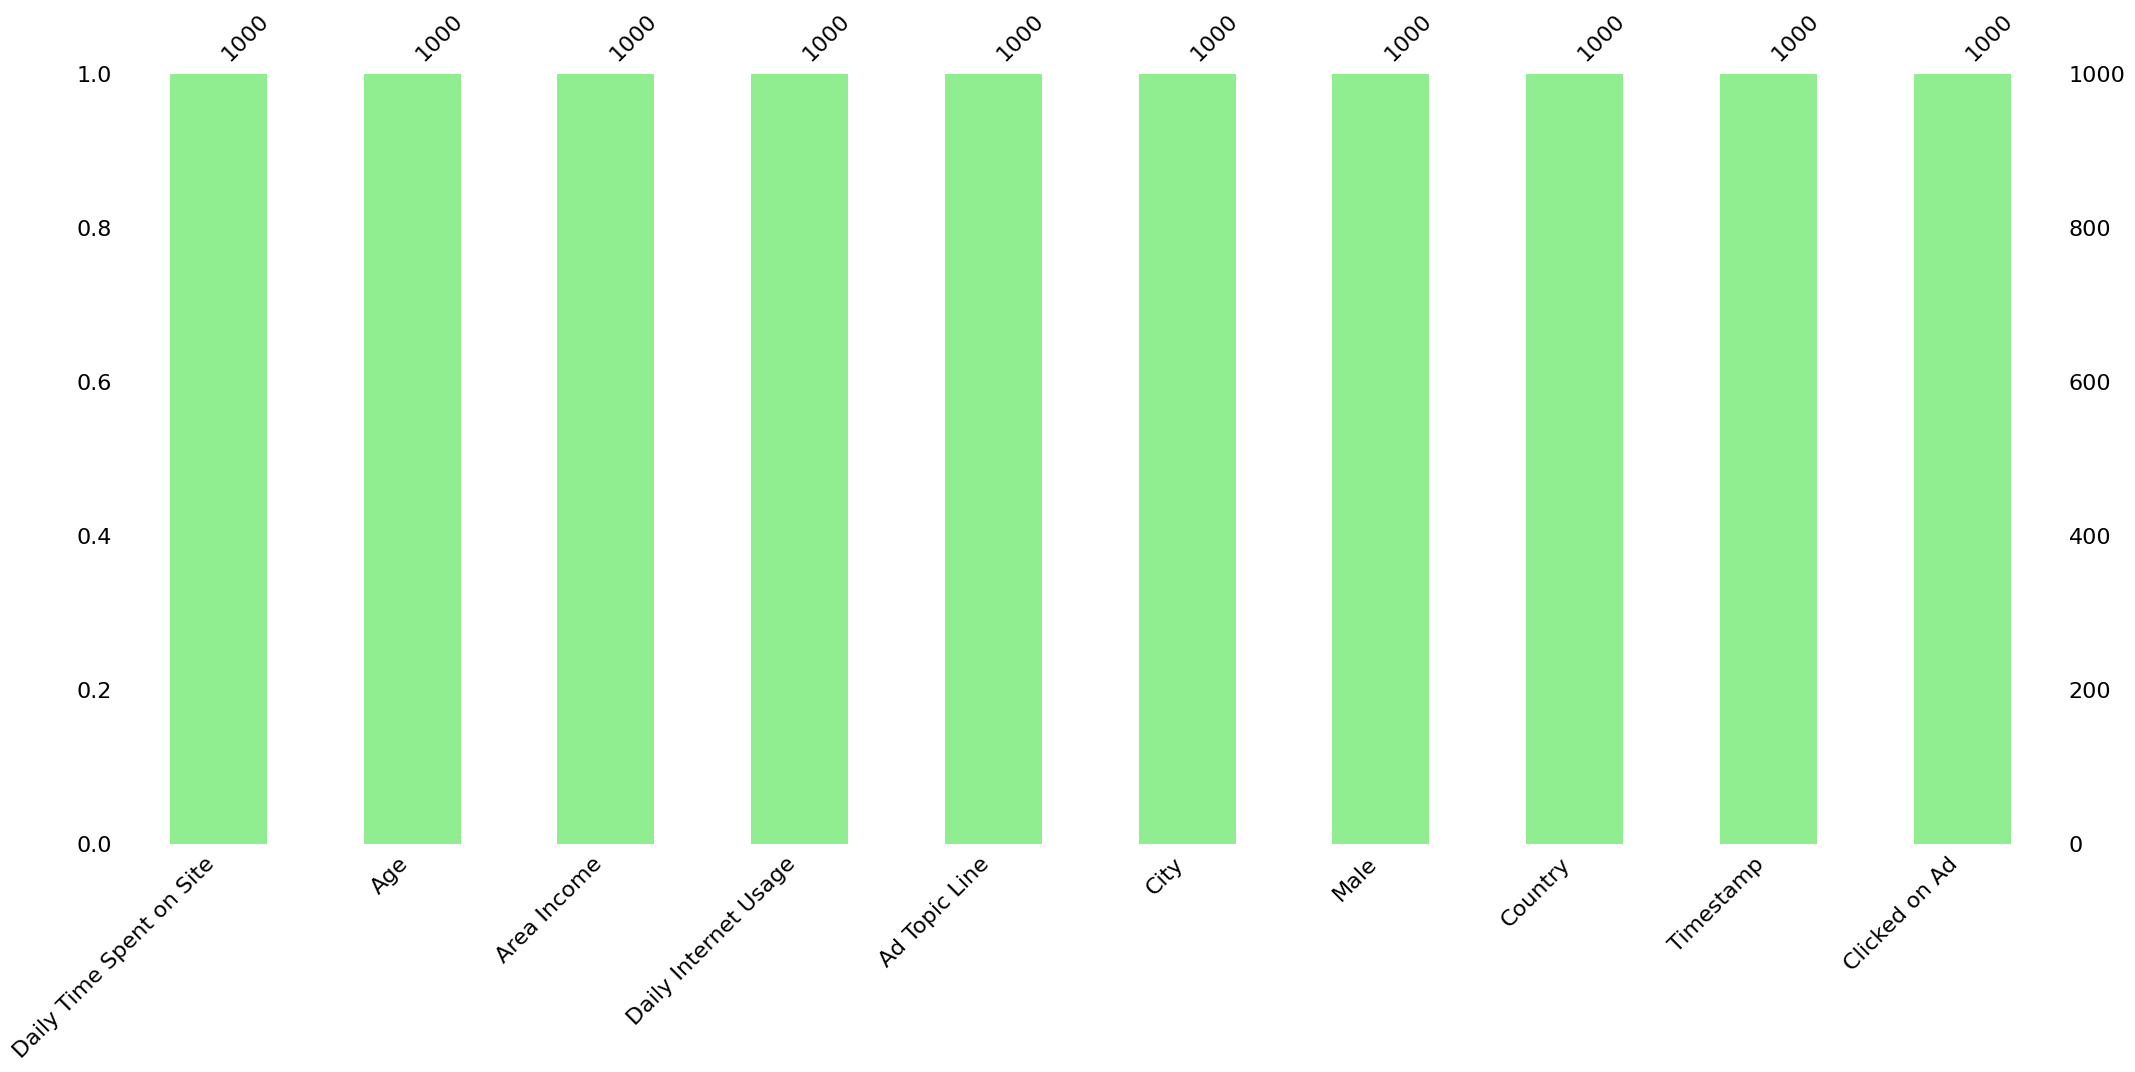

In [21]:
import missingno as no
no.bar(df, color='lightgreen')

<Axes: >

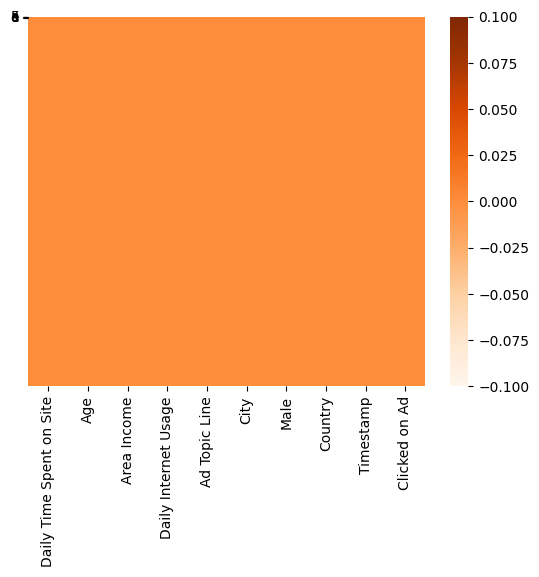

In [22]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Oranges')

In [23]:
df.Male.value_counts()

,count
Male,
0,519
1,481


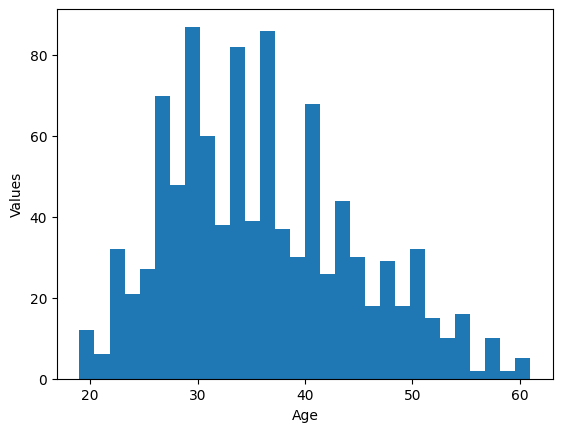

In [24]:
plt.hist(df['Age'],bins = 30)
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

<ipython-input-25-822118129551>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df['Clicked on Ad'], y=df['Age'], palette='magma_r')


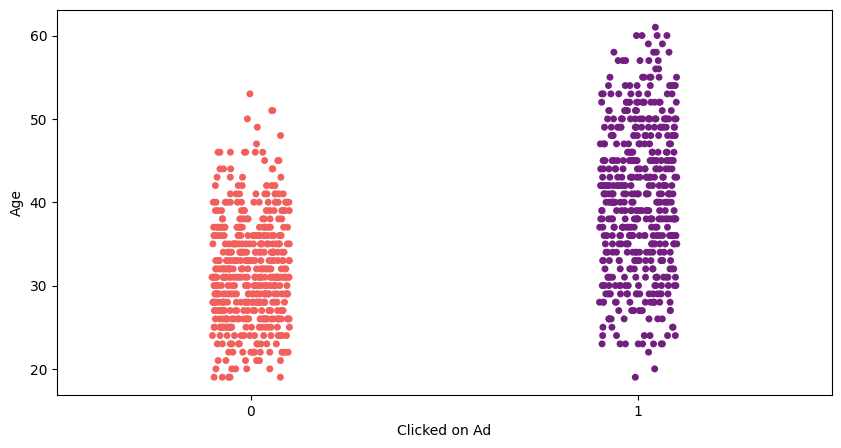

In [25]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['Clicked on Ad'], y=df['Age'], palette='magma_r')
plt.show()

<ipython-input-26-8487c54da375>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Clicked on Ad'], y=df.Age, palette='rainbow')


<Axes: xlabel='Clicked on Ad', ylabel='Age'>

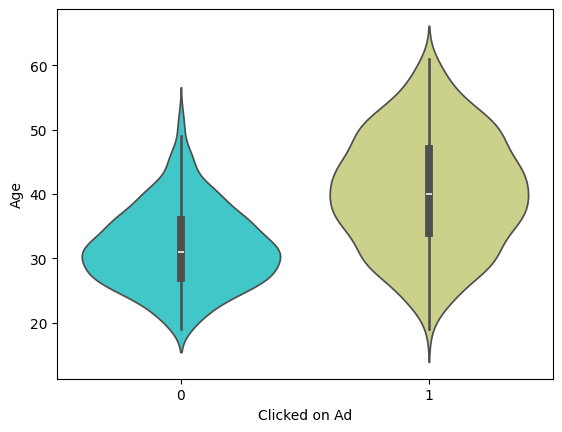

In [26]:
sns.violinplot(x=df['Clicked on Ad'], y=df.Age, palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


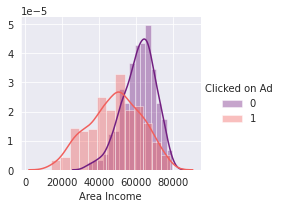

In [ ]:
sns.FacetGrid(df, hue='Clicked on Ad', palette='magma').map(sns.distplot, 'Area Income').add_legend()

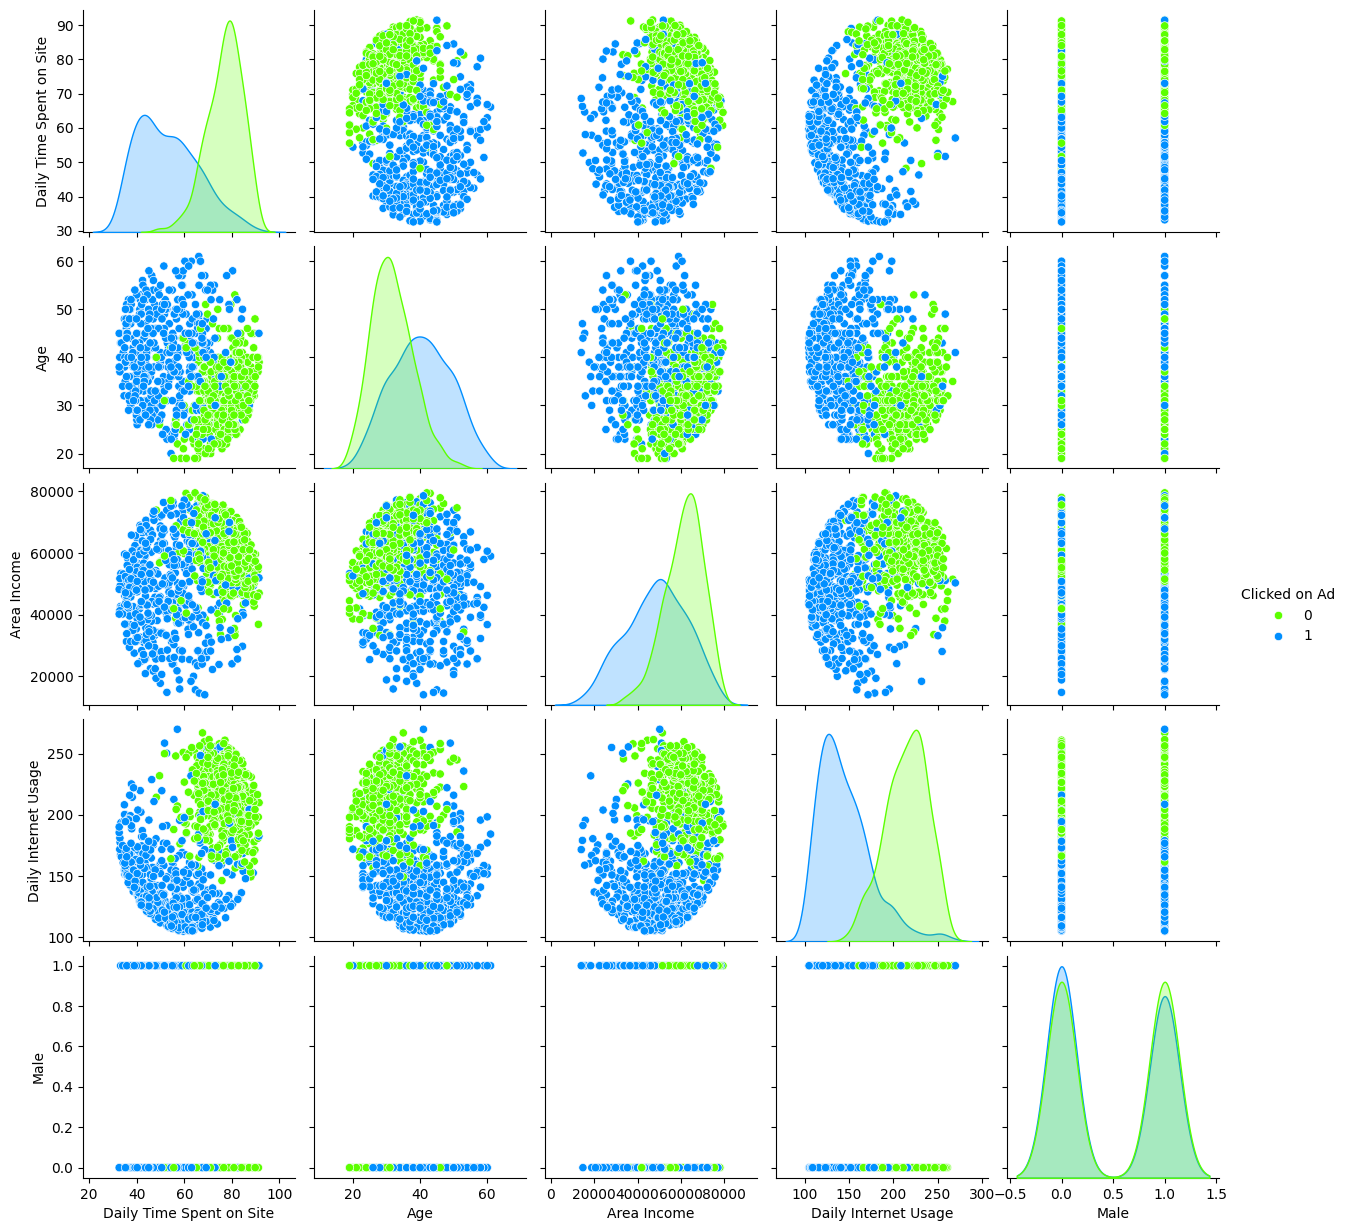

In [30]:
sns.pairplot(df,hue='Clicked on Ad',palette='gist_rainbow')

# Splitting the Data into Dependent and Indpendent variables

In [31]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [32]:
x.shape

(1000, 5)

In [33]:
y.shape

(1000,)

# Training and Testing the Data

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=5)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [36]:
lm = LogisticRegression(random_state=5)
lm.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

## Prediction

In [37]:
ypred_train = lm.predict(xtrain)
ypred_test = lm.predict(xtest)

## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[119,   7],
       [ 15, 109]])

<Axes: >

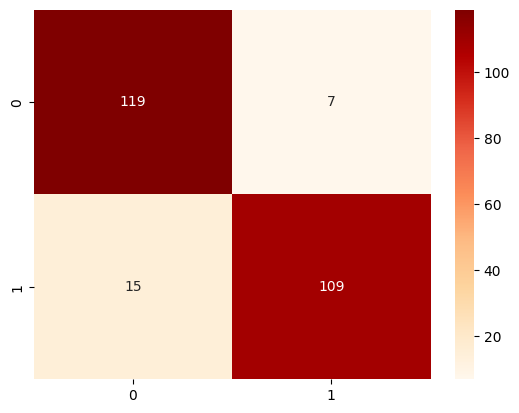

In [40]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="OrRd" ,fmt='g')

# Accuracy

In [41]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 89.2
Accuracy of testing data: 91.2


# Support Vector Machine

In [42]:
svc = SVC(C=10)
svc.fit(xtrain, ytrain)

SVC(C=10)

## Prediction

In [43]:
ypred_train = svc.predict(xtrain)
ypred_test = svc.predict(xtest)

## Confusion Matrix

In [44]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[111,  60],
       [ 15,  64]])

<Axes: >

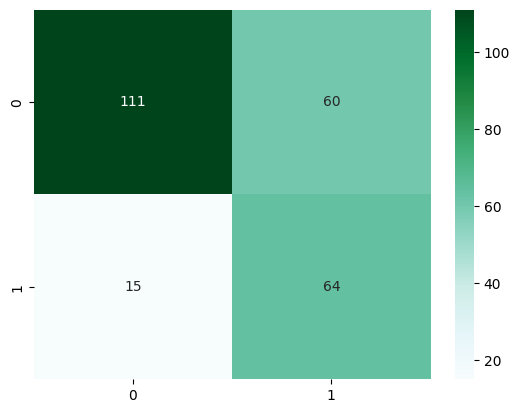

In [45]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuGn" ,fmt='g')

## Accuracy

In [46]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 71.73333333333333
Accuracy of testing data: 70.0


# K Nearest Neighbor

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

## Prediction

In [48]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

## Confusion Matrix

In [49]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[101,  34],
       [ 25,  90]])

<Axes: >

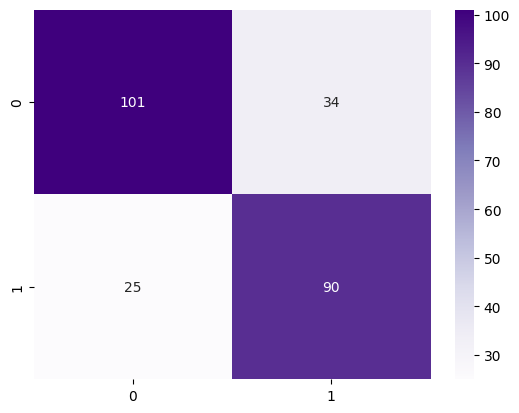

In [50]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples" ,fmt='g')

## Accuracy

In [51]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 100.0
Accuracy of testing data: 76.4


# Decission Tree

In [52]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

## Prediction

In [53]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [54]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[118,   8],
       [  8, 116]])

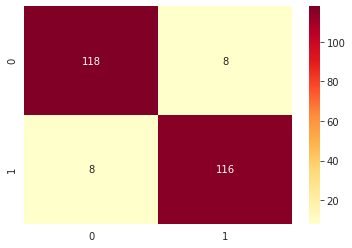

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Prediction

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 100.0
Accuracy of testing data: 93.60000000000001


# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Prediction

In [ ]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Matrix

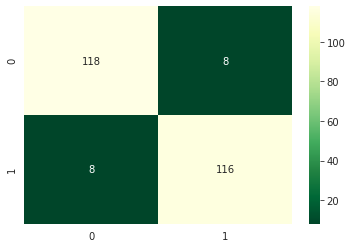

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn_r" ,fmt='g')

## Accuracy

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac5 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac5)

Accuracy of training data: 100.0
Accuracy of testing data: 94.8


# Comparing Accuracy of Different Models

In [ ]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'SVM', ac3:'KNN', ac4:'Decission Tree', ac5: 'Random Forest'}

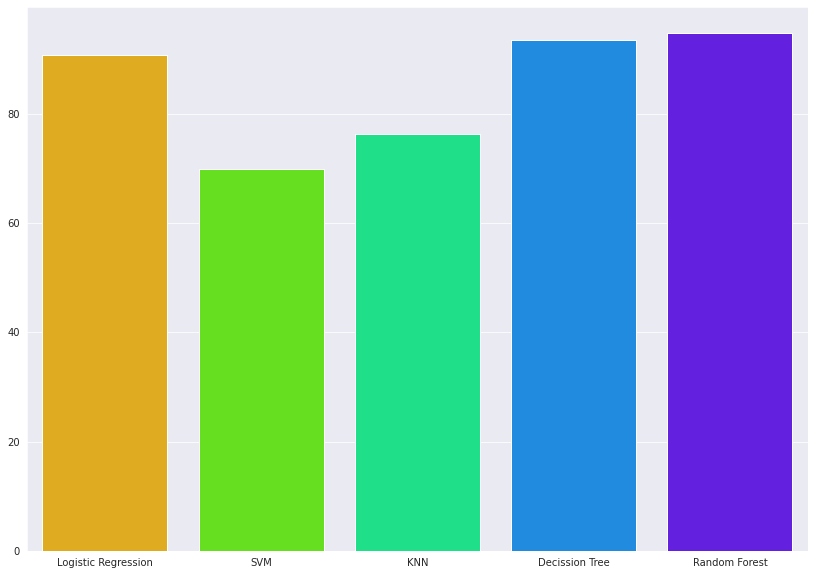

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow')

# Task
Tell me about this dataset.

Here is all the data you need:
"advertising.csv"

## Data loading

### Subtask:
Load the advertising dataset.


**Reasoning**:
Load the advertising dataset into a pandas DataFrame and display the first 5 rows.



In [5]:
import pandas as pd

try:
    df = pd.read_csv('advertising.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'advertising.csv' not found. Please ensure the file is in the correct location.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-16 3:36,0


## Data exploration

### Subtask:
Explore the loaded advertising dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by displaying its shape, info, descriptive statistics, missing values, and unique values for categorical columns.



In [2]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nInfo:")
df.info()

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Examine unique values for categorical columns (if any).  Since we don't know which are categorical, let's check the first few unique values of each column.
for col in df.columns:
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique()[:10]) # Display first 10 unique values

Shape of the DataFrame: (1000, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB

Descriptive Statistics:
       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.0000

## Data visualization

### Subtask:
Visualize the distribution of numerical features and the relationships between advertising spending and sales.


**Reasoning**:
Visualize the distribution of numerical features using histograms and explore relationships between features using scatter plots.



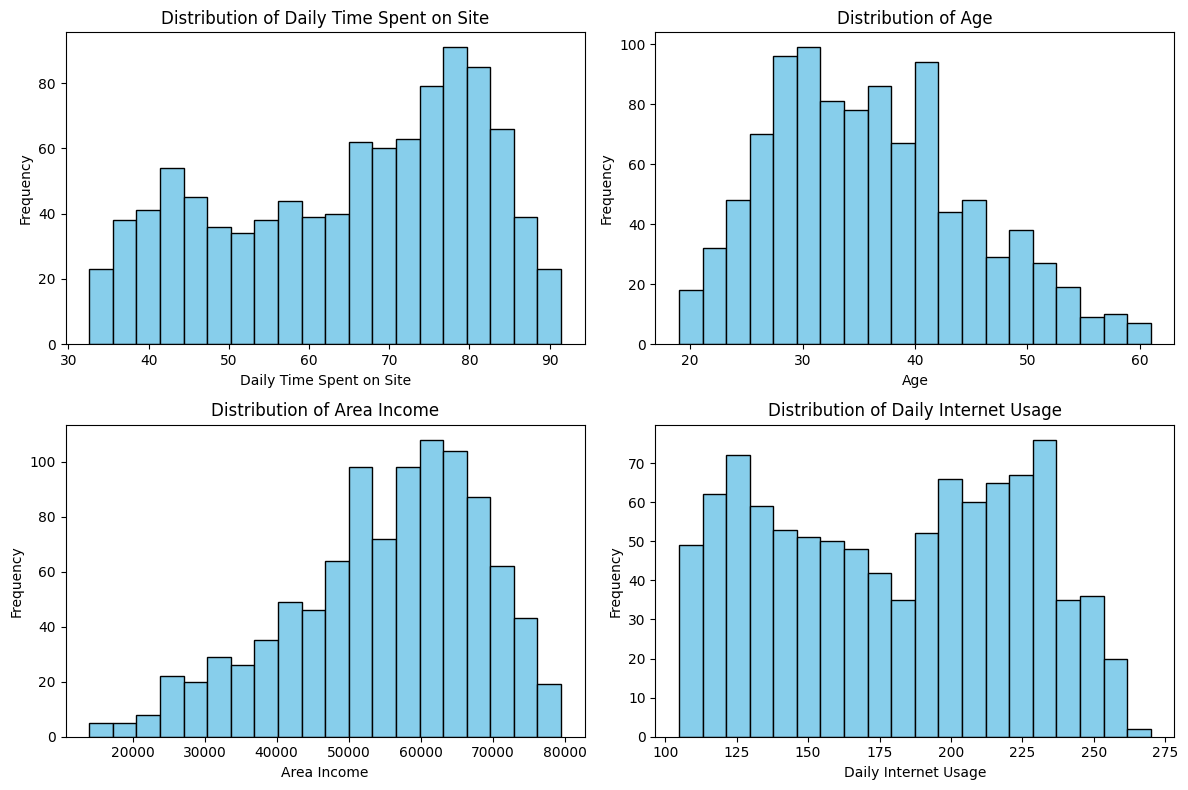

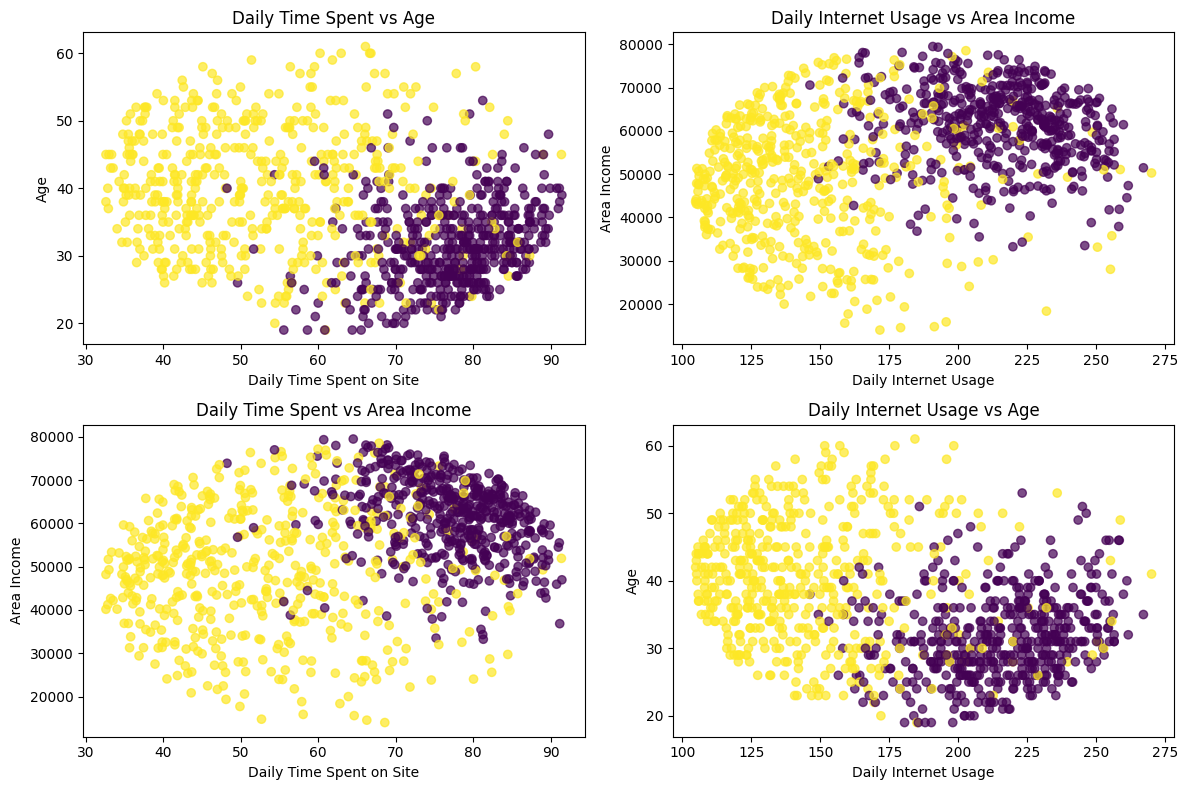

In [3]:
import matplotlib.pyplot as plt

# Select numerical features for analysis
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Create histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create scatter plots to explore relationships
plt.figure(figsize=(12, 8))

# Example: Relationship between 'Daily Time Spent on Site' and 'Age'
plt.subplot(2, 2, 1)
plt.scatter(df['Daily Time Spent on Site'], df['Age'], c=df['Clicked on Ad'], cmap='viridis', alpha=0.7)
plt.title('Daily Time Spent vs Age')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Age')

# Example: Relationship between 'Daily Internet Usage' and 'Area Income'
plt.subplot(2, 2, 2)
plt.scatter(df['Daily Internet Usage'], df['Area Income'], c=df['Clicked on Ad'], cmap='viridis', alpha=0.7)
plt.title('Daily Internet Usage vs Area Income')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Area Income')

# Example: Relationship between 'Daily Time Spent on Site' and 'Area Income'
plt.subplot(2, 2, 3)
plt.scatter(df['Daily Time Spent on Site'], df['Area Income'], c=df['Clicked on Ad'], cmap='viridis', alpha=0.7)
plt.title('Daily Time Spent vs Area Income')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Area Income')

# Example: Relationship between 'Daily Internet Usage' and 'Age'
plt.subplot(2, 2, 4)
plt.scatter(df['Daily Internet Usage'], df['Age'], c=df['Clicked on Ad'], cmap='viridis', alpha=0.7)
plt.title('Daily Internet Usage vs Age')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the relationships between features in the dataset, particularly focusing on the correlation between advertising spending (if available in the dataset) and sales.  If advertising spending columns are not present, analyze the relationships between other relevant numerical features and the 'Clicked on Ad' column.


**Reasoning**:
Calculate the correlation matrix and analyze the relationships between numerical features and 'Clicked on Ad', as there are no advertising spending columns in the dataset.



In [4]:
import pandas as pd
import numpy as np

# Calculate the correlation matrix for numerical features
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

# Analyze correlations with 'Clicked on Ad'
print("\nCorrelations with 'Clicked on Ad':")
correlations_with_clicked = correlation_matrix['Clicked on Ad'].drop('Clicked on Ad')
display(correlations_with_clicked)

# Identify the three strongest correlations
strongest_correlations = correlations_with_clicked.abs().nlargest(3)
print("\nThree Strongest Correlations with 'Clicked on Ad':")
display(strongest_correlations)

# Discuss the direction and strength of the relationships.
for feature, correlation in strongest_correlations.items():
    print(f"\nFeature: {feature}")
    print(f"Correlation with 'Clicked on Ad': {correlation}")
    if correlation > 0:
      print("Direction: Positive - As this feature increases, the likelihood of clicking on the ad tends to increase.")
    else:
      print("Direction: Negative - As this feature increases, the likelihood of clicking on the ad tends to decrease.")
    print(f"Strength: {abs(correlation)} (closer to 1 indicates a stronger linear relationship)")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000



Correlations with 'Clicked on Ad':


,Clicked on Ad
Daily Time Spent on Site,-0.748117
Age,0.492531
Area Income,-0.476255
Daily Internet Usage,-0.786539
Male,-0.038027



Three Strongest Correlations with 'Clicked on Ad':


,Clicked on Ad
Daily Internet Usage,0.786539
Daily Time Spent on Site,0.748117
Age,0.492531



Feature: Daily Internet Usage
Correlation with 'Clicked on Ad': 0.7865391758714916
Direction: Positive - As this feature increases, the likelihood of clicking on the ad tends to increase.
Strength: 0.7865391758714916 (closer to 1 indicates a stronger linear relationship)

Feature: Daily Time Spent on Site
Correlation with 'Clicked on Ad': 0.7481165641196352
Direction: Positive - As this feature increases, the likelihood of clicking on the ad tends to increase.
Strength: 0.7481165641196352 (closer to 1 indicates a stronger linear relationship)

Feature: Age
Correlation with 'Clicked on Ad': 0.49253126555603755
Direction: Positive - As this feature increases, the likelihood of clicking on the ad tends to increase.
Strength: 0.49253126555603755 (closer to 1 indicates a stronger linear relationship)


## Summary:

### 1. Q&A

The analysis explored the advertising dataset to understand its characteristics and relationships between features, particularly focusing on factors influencing "Clicked on Ad".  The key findings reveal which features most strongly correlate with ad clicks.

### 2. Data Analysis Key Findings

* **No Missing Data:** The dataset contains 1000 rows and 10 columns with no missing values.
* **Strongest Positive Correlation with Ad Clicks:**
    * Daily Internet Usage: 0.787 correlation.
    * Daily Time Spent on Site: 0.748 correlation.
    * Age: 0.493 correlation.
* **Correlation Interpretation:** Increased daily internet usage and time spent on the site strongly correlate with a higher likelihood of clicking on an ad.  Age shows a moderate positive correlation, suggesting older users are slightly more likely to click.

### 3. Insights or Next Steps

* **Target High-Engagement Users:** Focus advertising efforts on users with high daily internet usage and long site visit durations.
* **Further Investigate Age Segmentation:** Explore age-based advertising strategies to optimize campaigns for different demographics, given the moderate correlation with clicks.
